# Homework 1

In this homework you will be doing Decision Tree classification on the Breast Cancer dataset.
We will also be using data preprocessing to test ways to improve the classifier.


## Import all necessary libraries

In [1]:
# you should be familiar with numpy, pandas and matplotlib from HW0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# we're using the Breast Cancer dataset from sklearn.datasets
from sklearn import datasets

# we will also be using the PCA library from scikit learn for this exercise
from sklearn.decomposition import PCA

# we will use the StandardScaler method to z-score normalize our data
from sklearn.preprocessing import StandardScaler

# Remember you have to run this cell block before continuing!


In [2]:
# Load the dataset
breast_cancer_sk = datasets.load_breast_cancer(as_frame=True)
breast_cancer = pd.DataFrame(breast_cancer_sk.data, columns = breast_cancer_sk.feature_names)
breast_cancer["target"] = breast_cancer_sk.target
breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 1. Random Sampling [Anurata Hridi]

In this following exercise, you will be writting code to implement random sampling without replacement from scratch. No additional libraries are allowed.

In [3]:
# Random is the only additional library you can use for this problem
import random

def random_sampling(data, n):
    """
    Input: data: the pandas dataframe to sample.
           n: the number of samples (rows) to take
    Output: The randomly sampled dataset (without replacement) as a pd.Dataframe.
    Hint: You should look up the random.shuffle function
    """


In [5]:
# Test your function
sample = random_sampling(breast_cancer, 30)

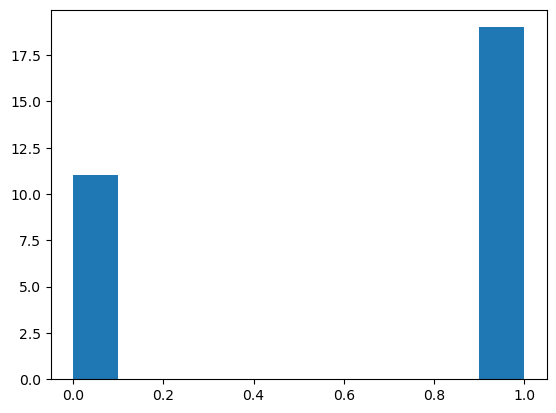

In [5]:
# Look at the distribution of the species (target attribute)
# How evenly are the species distributed with random sampling?


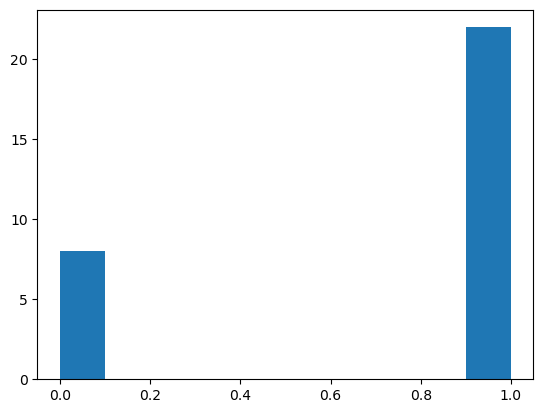

In [6]:
# Try running the function and the plot again - are the results the same?


In [6]:
# Assert that the correct number of rows were samples
np.testing.assert_equal(sample.shape,(30, 31))
# Assert sampling was done without replacement
assert sample.drop_duplicates().shape[0] == 30
# Assert that the first row is present in the original dataframe
assert any([(breast_cancer.iloc[i,:] == sample.iloc[0,:]).all() for i in breast_cancer.index])

## 2. Stratified Sampling [Anurata Hridi]

In this part, you will be writing code to do stratified sampling. Create a stratrified sample of the `breast_cancer` dataset, with 40 objects, that has an equal number of each **target** value (0 and 1).

**Store it in the variable `stratified_breast_cancer`**.

**Hint**: You should read about the [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) coding pattern in Pandas before starting this problem! In particular pay attention to the following:
* [Splitting an object into groups](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups)
* [Transformation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#transformation)


In [7]:
def stratified_sampling(data, n, attr):
    """
    Input: data: the dataset to sample
           n: the number of instances sampled from each value of the given attribute
           attr: the attribute to stratify on
    Output: The sampled dataset in pd.Dataframe format
    
    Allowed functions: df.groupby, df.apply, df.sample
    Hint: See the link in the function description above.
    """
    

In [8]:
# Test your function!
stratified_breast_cancer = stratified_sampling(breast_cancer, 10, 'target')

In [9]:
# View your output
stratified_breast_cancer

mean radius  mean texture  mean perimeter  mean area  \
target                                                             
0      203       13.810         23.75           91.56      597.8   
       56        19.210         18.57          125.50     1152.0   
       368       21.710         17.25          140.90     1546.0   
       171       13.430         19.63           85.84      565.4   
       521       24.630         21.60          165.50     1841.0   
       449       21.100         20.52          138.10     1384.0   
       365       20.440         21.78          133.80     1293.0   
       492       18.010         20.56          118.40     1007.0   
       47        13.170         18.66           85.98      534.6   
       264       17.190         22.07          111.60      928.3   
1      427       10.800         21.98           68.79      359.9   
       547       10.260         16.58           65.85      320.8   
       295       13.770         13.27           88.06      582.7   
       402       12.960         18.29           84.18      525.2   
       530       11.750         17.56           75.89      422.9   
       111       12.630         20.76           82.15      480.4   
       174       10.660         15.15           67.49      349.6   
       206        9.876         17.27           62.92      295.4   
       228       12.620         23.97           81.35      496.4   
       346       12.060         18.90           76.66      445.3   

            mean smoothness  mean compactness  mean concavity  \
target                                                          
0      203          0.13230           0.17680         0.15580   
       56           0.10530           0.12670         0.13230   
       368          0.09384           0.08562         0.11680   
       171          0.09048           0.06288         0.05858   
       521          0.10300           0.21060         0.23100   
       449          0.09684           0.11750         0.15720   
       365          0.09150           0.11310         0.09799   
       492          0.10010           0.12890         0.11700   
       47           0.11580           0.12310         0.12260   
       264          0.09726           0.08995         0.09061   
1      427          0.08801           0.05743         0.03614   
       547          0.08877           0.08066         0.04358   
       295          0.09198           0.06221         0.01063   
       402          0.07351           0.07899         0.04057   
       530          0.10730           0.09713         0.05282   
       111          0.09933           0.12090         0.10650   
       174          0.08792           0.04302         0.00000   
       206          0.10890           0.07232         0.01756   
       228          0.07903           0.07529         0.05438   
       346          0.08386           0.05794         0.00751   

            mean concave points  mean symmetry  mean fractal dimension  ...  \
target                                                                  ...   
0      203             0.091760         0.2251                 0.07421  ...   
       56              0.089940         0.1917                 0.05961  ...   
       368             0.084650         0.1717                 0.05054  ...   
       171             0.034380         0.1598                 0.05671  ...   
       521             0.147100         0.1991                 0.06739  ...   
       449             0.115500         0.1554                 0.05661  ...   
       365             0.077850         0.1618                 0.05557  ...   
       492             0.077620         0.2116                 0.06077  ...   
       47              0.073400         0.2128                 0.06777  ...   
       264             0.065270         0.1867                 0.05580  ...   
1      427             0.014040         0.2016                 0.05977  ...   
       547             0.024380         0.1669           

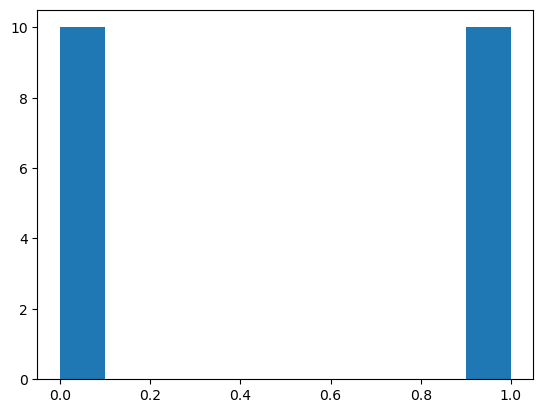

In [10]:
# look at distribution of target values, they supposed to be equally sampled.
plt.hist(stratified_breast_cancer["target"])
plt.show()
assert(stratified_breast_cancer.shape[0] == 20)
assert(sum(stratified_breast_cancer.target == 0) == 10)
assert(sum(stratified_breast_cancer.target == 1) == 10)

## 3. Decision Trees [Vodelina Samatova]

Now we are going to classify the malignant versus benign cases (the zeros versus the ones) with Decision Trees.

You can perform classification using a DecisionTree in python using the scikit-learn library. 

Take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to get a clear understanding of all function arguments.

Given below is a simple toy example for you to learn how to use the DecisionTreeClassifier.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# we will use the MinMaxScaler method to scale our data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [12]:
# y: target
# Check the shape of y



(569,)

In [13]:
# X: predictors
# Let's drop the column for the target variable

# Check the shape of X



(569, 30)

In the first step, we will split our data into train and test subsets. To get more insight into the function we are using here (*train_test_split()*), take a look at [this tutorial.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

* `X_train` is the features (independent variables) of the training dataset.
* `y_train` is the target (dependent) variable of the training dataset.
* `X_test` is the features (independent variables) of the test dataset.
* `y_test` is the target (dependent) variable of the test dataset.

In [14]:
def stratified_split(X, y, 
                     test_size=0.2, 
                     validate_size=0.2, 
                     random_state=0):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=test_size, random_state = random_state)

    # We need to calculate a new split size (the proportion of validation to the remaining)
    
    # let's assume we had 100 samples and we don't do this
    # then the split will be 20 + (20% of 80) + (80% of 80). 
    # But we want 20 + 20 + 60
    new_validate_size = validate_size / (1 - test_size)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, stratify=y_train, 
        test_size=new_validate_size, 
        random_state = random_state)

    return X_train, X_test, X_val, y_train, y_test, y_val

In [15]:
# Split data into training, validation, and testing data sets



In [16]:
# Examine the split proportions 

print ("Training (X_train and y_train): \t", X_train.shape, " \t", y_train.shape)

print ("Validation (X_val and y_val): \t\t", X_val.shape, " \t", y_val.shape)

print ("Testing (X_test and y_test): \t\t", X_test.shape, "  \t", y_test.shape)

Training (X_train and y_train): 	 (341, 30)  	 (341,)
Validation (X_val and y_val): 		 (114, 30)  	 (114,)
Testing (X_test and y_test): 		 (114, 30)   	 (114,)


In [17]:
# Inspect X_train


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
401,11.930,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541,...,13.80,20.14,87.64,589.5,0.1374,0.15750,0.1514,0.06876,0.2460,0.07262
278,13.590,17.84,86.24,572.3,0.07948,0.04052,0.01997,0.01238,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.1060,0.05185,0.2335,0.06263
497,12.470,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,14.06,24.34,92.82,607.3,0.1276,0.25060,0.2028,0.10530,0.3035,0.07661
293,11.850,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.02280,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.1316,0.09140,0.3101,0.07007
505,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.07038,0.2057,0.09575,...,10.60,18.04,69.47,328.1,0.2006,0.36630,0.2913,0.10750,0.2848,0.13640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,19.590,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,21.44,30.96,139.80,1421.0,0.1528,0.18450,0.3977,0.14660,0.2293,0.06091
172,15.460,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,...,18.79,17.04,125.00,1102.0,0.1531,0.35830,0.5830,0.18270,0.3216,0.10100
48,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.02749,0.1675,0.06043,...,13.76,20.70,89.88,582.6,0.1494,0.21560,0.3050,0.06548,0.2747,0.08301
84,12.000,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,0.05968,...,13.67,24.90,87.78,567.9,0.1377,0.20030,0.2267,0.07632,0.3379,0.07924


In [18]:
# Inspect y_train


401    1
278    1
497    1
293    1
505    1
      ..
451    0
172    0
48     1
84     1
253    0
Name: target, Length: 341, dtype: int32

Now implement a decision tree function below to do the following:

1. Train a decision tree model with the **training datasets** created above (using **gini index** as the criteria and **random_state = 1234** in order to keep consistency).
2. Use the model trained from step 1 to make predictions on the **test data** created above

**Store the predictions in the variable `dtree_predictions`**. 

In [19]:
dtree_predictions = None



In [20]:
# Test your result!
dtree_predictions

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1])

In this step, you will look into the accuracy score of the decision tree predictions. In other words, you would compare the predictions of the decision tree with the actual test labels you have in the testing set. 

For more documentation, take a look at [this article.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [21]:
accuracy_score(dtree_predictions, y_test)

0.8859649122807017

In [22]:
# Public tests for dtree
np.testing.assert_almost_equal(
    accuracy_score(dtree_predictions,
                   y_test),
    0.8859649122807017
)

## 4. Feature Selection [Vodelina Samatova]

In this problem, you will see if feature selection can improve the accuracy of your classifier!

We do feature selection to remove unnecessary features, and also to see which features are most useful for prediction. You could imagine predicting diabetes progression would be easier if we know which features are relevant for doing so.

In the function below, you will implement a feature selection aglorithm, which selects the $k$ best features according to some measure. In this case we'll use the  [ANOVA F-value](https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/), which is a measure of the linear relationship between each feature and the target variable (just like correlation).

**Note**: Remember, we can't peek at the test data, even during feature selection (if we knew what features were useful on the test dataset, that would be unrealistic). Therefore, it is important that you fit the the feature selction function **ONLY** on the *training* set. One the feature selector is fit (i.e. figures out which features to keep), you can use it to transform both training and testing dataset (`X_train` and `X_test`), i.e. remove the unneeded features.

**HINT**: Feature selection is performed using [SelectKBest function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) with [ANOVA F-value](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif) function.

**HINT**: In python you can return multiple values, separated by commas, e.g. `return 1, 2, 3`.

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def feature_selection(X_train, y_train, X_test, k=7):
    """
     Input:
          x_train: A numpy array of shape (n_training_rows, n_attributes) where n_training_rows refers to 
          the number of rows in your training dataset and n_attributes refers to the number of attributes. 
          y_train: A numpy array of shape (n_training_rows, ) containing the class labels for each row in your 
          training dataset.
          x_test: A numpy array of shape (n_testing_rows, n_attributes) where n_testing_rows refers to the number 
          of rows in your testing dataset and n_attributes refers to the number of attributes. 
          k: number of features to select.
    Output:
          fs: The fit feature selector
          X_train_selected: The transformed training set, with features selected. 
                            The result should be a numpy array of shape (n_training_rows, k).
          X_test_selected: The transformed testing set, with features selected.
    
    Allowed Libraries: sklearn
    """

    # define feature selection


    # apply feature selection



In [24]:
# Test your function

fs,X_train_selected,X_test_selected = feature_selection(X_train, y_train, X_test, 7)

# Check the score for each individual feature (i.e. how important is each feature)
print(fs.scores_)

# Check whether acheived seven best attributes for both training and testing set
print(X_train_selected.shape)
print(X_test_selected.shape)

[3.97103087e+02 7.16141495e+01 4.28113948e+02 3.58584369e+02
 7.26613639e+01 1.88921929e+02 3.09301461e+02 4.98464896e+02
 4.80923033e+01 2.88016117e-01 2.32494340e+02 1.23860267e-01
 2.20657951e+02 2.73400444e+02 6.76924819e-01 3.16906531e+01
 2.62773960e+01 8.73032946e+01 9.74232240e-03 3.61361287e+00
 5.21040858e+02 9.08317132e+01 5.46735496e+02 4.10763253e+02
 8.12845018e+01 1.66939711e+02 2.33579586e+02 5.15355737e+02
 7.04857365e+01 3.71551709e+01]
(341, 7)
(114, 7)


In [25]:
# Let's get the name of the selected features

print("Original features are: \n" + str(X_train.columns.values))

print("Selected best feautures are: \n" + str(X_train.columns.values[fs.get_support()]))

Original features are: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Selected best feautures are: 
['mean radius' 'mean perimeter' 'mean concave points' 'worst radius'
 'worst perimeter' 'worst area' 'worst concave points']


In [26]:
# Public tests for feature_selection
fs, selected_train, selected_test = feature_selection(X_train, y_train, X_test, 5)
assert (selected_train.shape[1] == 5)
assert (selected_test.shape[1] == 5)
assert ('concavity error' not in X_train.columns.values[fs.get_support()])
assert ('worst radius' in X_train.columns.values[fs.get_support()])

## 5. Feature Transformation [Sogolsadat Mansouri]

Now we will combine feature selection with normalization into a *pipeline*, and test whether it improves our mode.

In some cases, you would want to perform certain feature transformations such as z-score normalization.

Take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to get a clear understanding of all function argumetns for z-score normalization.

Given below is a simple example for you to learn how to use z-score normalization and combine it with other data processing procedures. 

In [27]:
# let's use a toy dataset to demonstrate z-score normalization. 
# We are using the wine dataset from sklearn.datasets as our toy dataset.

# First load the data
toy_dataset = datasets.load_wine(as_frame=True).data

# To emulate an actual model learning process, we split the data set into trainining and testing set
toy_train, toy_test = train_test_split(toy_dataset, test_size = 0.33)

# Here we use StandardScaler class from sklearn to normalize
toy_norm_train = StandardScaler().fit(toy_train).transform(toy_train)

# Notice here we use the training set to fit the StandardScaler, i.e. compute the mean and standard deviation,
# and use it to normalize testing set, just like with feature selection, above.
# This is because in real-world deployment case, you very likely won't know the parameter of unseen data distribution
# (testing set). So a normal approach is to use distribution parameters estimated from training set to transform
# unseen data.
toy_norm_test = StandardScaler().fit(toy_train).transform(toy_test)


In [28]:
# Note the means are all different
toy_train.mean()

alcohol                          12.944118
malic_acid                        2.426218
ash                               2.368739
alcalinity_of_ash                19.513445
magnesium                        98.663866
total_phenols                     2.293361
flavanoids                        1.986555
nonflavanoid_phenols              0.366303
proanthocyanins                   1.537227
color_intensity                   4.939328
hue                               0.954168
od280/od315_of_diluted_wines      2.612437
proline                         735.915966
dtype: float64

In [29]:
# And the standard deviations vary
toy_train.std()

alcohol                           0.794661
malic_acid                        1.187919
ash                               0.290142
alcalinity_of_ash                 3.169396
magnesium                        13.570455
total_phenols                     0.620535
flavanoids                        1.018769
nonflavanoid_phenols              0.129483
proanthocyanins                   0.578196
color_intensity                   2.193989
hue                               0.226219
od280/od315_of_diluted_wines      0.720759
proline                         306.457827
dtype: float64

In [30]:
# Now column means are all near 0
print(toy_norm_train[:,0].mean())
print(toy_norm_train[:,1].mean())
print(toy_norm_train[:,2].mean())
print(toy_norm_train[:,3].mean())

8.114424165275041e-16
-1.408770392591585e-16
-1.917233878659409e-15
3.638546047090849e-17


In [31]:
# Now and standard deviations are near 1
print(toy_norm_train[:,0].std())
print(toy_norm_train[:,1].std())
print(toy_norm_train[:,2].std())
print(toy_norm_train[:,3].std())

1.0
0.9999999999999999
1.0
1.0


You will build a pipeline that perform both feature selection (using your earlier function) and z-score normalization.

In [32]:
def normalize_feature_select(X_train, y_train, X_test, k = 7):
    """
    You will build a pipeline that perform the following steps:
        1. z-score normalize the x_train and x_test using x_train.
        2. perform feature selection.
    
    Your inputs and outputs are as shown below:
    
    Input:
          x_train: A numpy array of shape (n_training_rows, n_attributes) where n_training_rows refers to 
              the number of rows in your training dataset and n_attributes refers to the number of attributes. 
          y_train: A numpy array of shape (n_training_rows, ) containing the class labels for each row in your 
              training dataset.
          x_test: A numpy array of shape (n_test_rows, n_attributes) where n_test_rows refers to the number 
              of rows in your target dataset and n_attributes refers to the number of attributes. 
          k: number of features to select.
    Output:
          x_train_selected: A numpy array of shape (n_train_rows, n_selected_attributes) containing 
              z-score normalized data from x_train with selected features only. 
              n_selected_attributes is the number of selected features.
          x_test_selected: A numpy array of shape (n_test_rows, n_selected_attributes) containing 
              z-score normalized data from x_test with selected features only. 
              n_selected_attributes is the number of selected features.
          
    Allowed Libraries: sklearn
    """
    
    ### BEGIN SOLUTION
    scaler = StandardScaler().fit(X_train)
    X_norm_train = scaler.transform(X_train)
    X_norm_test = scaler.transform(X_test)
    
    _, X_train_selected, X_test_selected = feature_selection(X_norm_train, y_train, X_norm_test, k=k)
    
    return X_train_selected, X_test_selected
    ### END SOLUTION

In [33]:
#Test your code!
X_norm_selected_train, X_norm_selected_test = normalize_feature_select(X_train, y_train, X_test, k = 7)

# Mean of attribute 0 should be 0
print(X_norm_selected_train[:,0].mean())
# Standard deviation of attriute 0 should be 1
print(X_norm_selected_train[:,0].std())

-8.334812149678595e-17
1.0


In [34]:
# Public tests for feature_selection
selected_train, selected_test = normalize_feature_select(X_train, y_train, X_test, 5)
assert (selected_train.shape[1] == 5)
assert (selected_test.shape[1] == 5)
for i in range(0, 5):
    np.testing.assert_almost_equal(X_norm_selected_train[:,i].mean(), 0)
    np.testing.assert_almost_equal(X_norm_selected_train[:,i].std(), 1)
    # test set shouldn't be perfectly centered or scaled
    assert X_norm_selected_test[:,i].mean() != 0
    assert X_norm_selected_test[:,i].std() != 1

Now is the moment of truth - did the decision tree improve our classifier? Let's compare.

In [35]:
# First, let's recreate the original decision tree.
dtree_predictions = dtree(X_train, y_train, X_test, 'gini', 1234) # Random see for consistency
accuracy_score(dtree_predictions, y_test)

0.8859649122807017

In [36]:
# Next the normalized, feature selected tree
dtree_norm_selected_predictions = dtree(X_norm_selected_train, y_train, X_norm_selected_test, 'gini', 1234)
accuracy_score(dtree_norm_selected_predictions, y_test)

0.9035087719298246

Which features did better - the originals or the normalized, feature selected ones? How much of a difference did preprocessing make? Based on what you know about decision trees, z-score normalization and feature selection, why do you think this was the case? Answer below in 2-3 sentences.

## 6. PCA [Sogolsadat Mansouri]

## Examples

You can perform PCA in python using the scikit-learn library. Take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to get a clear understanding of all function arguments.

Given below is a simple toy example for you to learn how to use PCA. 

In [37]:
# let's use a toy dataset to demonstrate PCA. We are using the wine dataset from sklearn.datasets as our toy dataset.
# We will apply PCA on it and extract the first two principal components. 
# While there are ways to directly extract the principal components using the sklearn methods, for the purpose 
# of this exercise, we will first extract the eigen vectors and then calculate the principal components from these eigen vectors. 

# first, load and z-score normalize the data
toy_dataset_sk = datasets.load_wine(as_frame=True)
toy_dataset = pd.DataFrame(StandardScaler().fit_transform(toy_dataset_sk.data), columns = toy_dataset_sk.feature_names)

# Display the dataset for your reference
# note that you can use the display() method to display your pandas dataframe in Jupyter
#display(toy_dataset)

# apply PCA on the toy dataset and extract the eigen vectors of the first two principal components
toy_pca = PCA(n_components = 2).fit(toy_dataset)
toy_eigen_vectors = toy_pca.components_

# now extract the first two principal components
# Recall from class material how to do this.  
# Take a look at matrix multiplication using numpy here: 
# https://numpy.org/doc/stable/reference/generated/numpy.matmul.html
toy_principal_components = np.matmul(toy_dataset.values , toy_eigen_vectors.T)


In [38]:
# Explore the outputs of the eigen vectors and principal components to gain a better understanding
# Explore other outputs...
print(toy_eigen_vectors.T.shape)
print(toy_dataset.values.shape)

(13, 2)
(178, 13)


### 6.1: Extracting Eigen Vectors

In [39]:
# Problem 1
def principal_component_analysis(data, n_components):
    """
    Input: 
          data: Data frame with M numeric attributes.
          n_components: the number of principal components to calculate 
                        (e.g. 2 for two principal components)
    Output:
          a numpy array of floating point numbers of shape (n_components, M), 
          containing the first n_components eigen vectors.
            
    """
    ## BEGIN SOLUTION
    return PCA(n_components = n_components).fit(data).components_
    ## END SOLUTION

In [40]:
principal_component_analysis(X_train, 2)[0, :8]

array([5.12825519e-03, 2.03465285e-03, 3.54652494e-02, 5.12615868e-01,
       5.78609066e-06, 4.57868339e-05, 8.67624021e-05, 5.08950783e-05])

In [41]:
# Test your function!
# note that you can convert your pandas data frame into a numpy matrix by using the dataframe.values property
eigen_vectors = principal_component_analysis(X_train, 2)
# Each of the 2 eigen vectors should have a value/weight for each of the original 13 attributes
eigen_vectors.shape

(2, 30)

In [42]:
assert principal_component_analysis(X_train, 2).shape == (2, 30)
np.testing.assert_almost_equal(
    principal_component_analysis(X_train, 2)[0, :8], 
    np.array(
        [5.12825519e-03, 2.03465285e-03, 3.54652494e-02, 5.12615868e-01,
       5.78609066e-06, 4.57868339e-05, 8.67624021e-05, 5.08950783e-05]
    )
)

### 6.2. Calculating Principal Components from Eigen Vectors

In [43]:
# Problem 2
def principal_component_calculation(data, component_weights):
    """
    Input: 
          data: A data frame with N rows and M numeric attributes (e.g. 178 x 13). 
          component_weights: a numpy array of shape (n_components, M) containing the weights (eigen vector) of 
              the first n_components principal components 
              (i.e. the output from running principal_component_analysis from problem 1)
    Output:
          a pandas dataframe of shape (N, n_components) ontaining the n_components principal components,
          calculated for each of the N rows in data.
    Hint: Can you solve this with matrix multiplication? Check out the np.matmul function.
    """
    ## BEGIN SOLUTION
    return np.matmul(data, component_weights.T)
    ## END SOLUTION


In [44]:
# Test your function

# note that eigen_vectors are the eigen vectors you calculated earlier using principal_component_analysis. 
# We're calculating it again here for ease of use
eigen_vectors = principal_component_analysis(X_train, 2)
principal_component_values = principal_component_calculation(X_train, eigen_vectors)
print(f'Principal components are = {principal_component_values} and their shape is {principal_component_values.shape}')

Principal components are =                0           1
401   739.235194  -80.476200
278   934.715725 -115.089973
497   773.733828 -103.983555
293   672.398579 -108.838898
505   427.046873  -68.130689
..           ...         ...
451  1840.164522 -295.528126
172  1332.336319  -69.872248
48    736.952945  -89.724210
84    720.999784  -92.221661
253  1533.196881 -173.170427

[341 rows x 2 columns] and their shape is (341, 2)


In [45]:
test_eigen_vectors = principal_component_analysis(X_train, 2)
test_pc = principal_component_calculation(X_train, test_eigen_vectors)
assert test_pc.shape == (X_train.shape[0], 2)
np.testing.assert_almost_equal(test_pc.iloc[0, :], [739.2351938, -80.476189], decimal=5)

### 6.3: Visualize your results

You've gained familiarity with matplotlib in HW0. Now use matplotlib to

a) generate a plot with the first principal component on x-axis, second principal component on y-axis. 

b) Assign color to each data point according to the target value. You can do this using the splitted y_train or y_test, depending on which set you are plotting.  

***Hint 1:*** Take a look at the [plt.scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html) function. Pay close attention to the 'c' variable. 

c) Name the x-axis as "PC1", y-axis as "PC2"

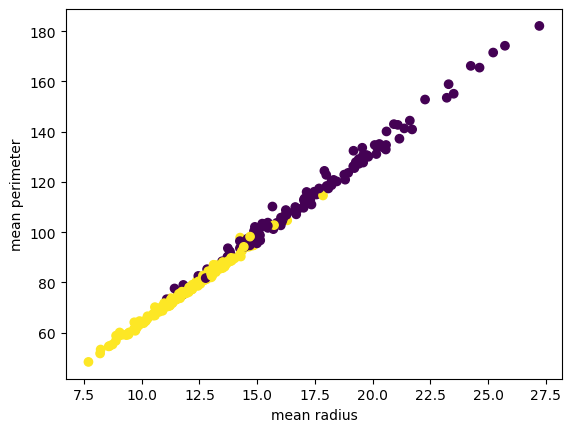

In [46]:
# This is an example of a scatter plot, using the bmi and age of participants
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 2], c=y_train)
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[2])
plt.show()

# How well does this plot separate the 2 different classes?

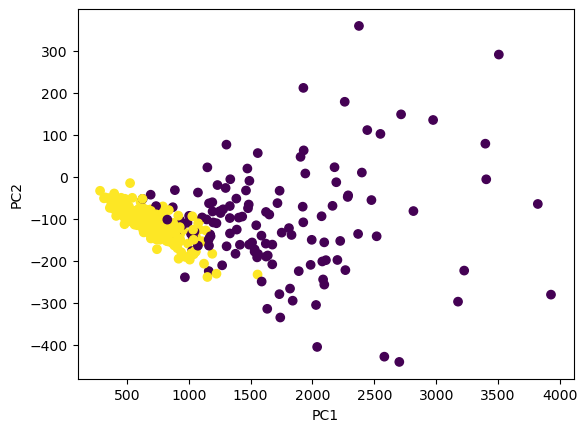

In [47]:
# Problem 3 (see question above)

# recalculating eigen vectors and principal components for ease of use
eigen_vectors = principal_component_analysis(X_train, 2)
principal_component_values = principal_component_calculation(X_train, eigen_vectors)
## BEGIN SOLUTION
plt.scatter(principal_component_values.iloc[:, 0], principal_component_values.iloc[:, 1], c=y_train)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
## END SOLUTION


Do the first 2 PCs separate the data better than the first 2 numeric attributes?